# Predicting Students Maths Performance

## Table Of Contents
- [Introduction](#Introduction)
    - [Dataset Source](#DatasetSource)
    - [Dataset Details](#DatasetDetails)
    - [Dataset Variables](#DatasetVariables)
    - [Response Variable](#ResponseVariable)
    
- [Goals & Objectives](#Goals&Objectives)

- [Data Cleaning & Preprocesseing](#DataCleaning&Preprocesseing)

- [Data Exploration & Visualisation](#DataExploration&Visualisation)
    - [Literature Review](#LiteratureReview)
    
- [Summary & Conclusions](#Summary&Conclusions)

- [References](#References)

## Introduction <a id="Introduction"></a>

### Dataset Source <a id="DatasetSource"></a>

The dataset used in this study was obtained from Kaggle. This dataset includes the Maths grades of secondary school students in two Portuguese schools.

### Dataset Details <a id="DatasetDetails"></a>

This dataset is about the Final Math scores of secondary school students. In the dataset we have different features such as: the school of the students, the gender of the students, the age of students, the students home address, the students parents relationship status, the amount of time students study in a week, the number of classes the students had failed previously, the final Maths score achieved, and more. These features should be adequate for a linear regression problem on the students final scores.

The dataset has a total of 33 features (columns before dropping anything) and 395 observations (rows).

We will retrieve the dataset from our own devices by reading it since we have the csv file (the dataset) in the same folder as this jupyter notebook file.

In [134]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import requests
import io 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [135]:
# reading the csv file and naming it 'Maths_Scores'
Maths_Scores = pd.read_csv('Maths.csv')


In [136]:
Maths_Scores.sample(10, random_state=643)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
355,MS,F,18,U,GT3,T,3,3,services,services,course,father,1,2,0,no,yes,no,no,yes,yes,no,yes,5,3,4,1,1,5,0,10,9,9
50,GP,F,16,U,LE3,T,2,2,services,services,course,mother,3,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,2,3,4,2,12,13,13
265,GP,M,18,R,LE3,A,3,4,other,other,reputation,mother,2,2,0,no,yes,yes,yes,yes,yes,yes,no,4,2,5,3,4,1,13,17,17,17
263,GP,F,17,U,GT3,T,3,3,other,other,home,mother,1,3,0,no,no,no,yes,no,yes,no,no,3,2,3,1,1,4,4,10,9,9
375,MS,F,18,R,GT3,T,1,1,other,other,home,mother,4,3,0,no,no,no,no,yes,yes,yes,no,4,3,2,1,2,4,2,8,8,10
106,GP,F,15,U,GT3,T,2,2,other,other,course,mother,1,4,0,yes,yes,yes,no,yes,yes,yes,no,5,1,2,1,1,3,8,7,8,8
207,GP,F,16,U,GT3,T,4,3,teacher,other,other,mother,1,2,0,no,no,yes,yes,yes,yes,yes,yes,1,3,2,1,1,1,10,11,12,13
349,MS,M,18,R,GT3,T,3,2,other,other,course,mother,2,1,1,no,yes,no,no,no,yes,yes,no,2,5,5,5,5,5,10,11,13,13
295,GP,M,17,U,GT3,T,3,3,health,other,home,mother,1,1,0,no,yes,yes,no,yes,yes,yes,no,4,4,3,1,3,5,4,14,12,11
140,GP,M,15,U,GT3,T,4,3,teacher,services,course,father,2,4,0,yes,yes,no,no,yes,yes,yes,no,2,2,2,1,1,3,0,7,9,0


### Dataset Variables <a id="DatasetVariables"></a>

The variables or features we are going to use in our report are shown in the table below.

In [137]:
from tabulate import tabulate

Variable_table = [['Name','Data Type','Units','Description'],
                 ['school', 'Nominal categorical', 'NA', 'The school that the student attends (GP or MS)'],
                 ['sex', 'Nominal categorical', 'NA', 'The sex of the student (M/Male or F/Female)'],
                 ['age', 'Numerical', 'Years', 'Age of the student'],
                 ['studytime', 'Ordinal categorical', 'Hours', 'Number of hours the student studies per week:\n 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours,\n or 4 - >10 hours'],
                 ['Medu', 'Ordinal categorical', 'NA', 'Highest level of mother\'s education: \n0 - none, 1 - primary education (4th grade), \n2 - 5th to 9th grade, \n3 - secondary education or 4 - higher education'],
                 ['Fedu', 'Ordinal categorical', 'NA', 'Highest level of father\'s education: \n0 - none, 1 - primary education (4th grade), \n2 - 5th to 9th grade, \n3 - secondary education or 4 - higher education'],
                 ['failures', 'Numerical', 'NA', 'Number of courses the student has failed previously: \nn if 0<=n<=3, else 4'],
                 ['absences', 'Numerical', 'NA', 'Number of times the student was absent'],
                 ['famrel', 'Ordinal categorical', 'NA', 'Quality of family relationships (from 1 - very bad to 5 - excellent)'],
                 ['Pstatus', 'Nominal categorical', 'NA', 'Parent\'s cohabitation status (\'T\' - living together or \'A\' - apart)'],
                 ['G3', 'Numerical', 'NA', 'Final Maths grade (0 - 20)']]


print(tabulate(Variable_table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════╤═════════════════════╤═════════╤══════════════════════════════════════════════════════════════════════╕
│ Name      │ Data Type           │ Units   │ Description                                                          │
╞═══════════╪═════════════════════╪═════════╪══════════════════════════════════════════════════════════════════════╡
│ school    │ Nominal categorical │ NA      │ The school that the student attends (GP or MS)                       │
├───────────┼─────────────────────┼─────────┼──────────────────────────────────────────────────────────────────────┤
│ sex       │ Nominal categorical │ NA      │ The sex of the student (M/Male or F/Female)                          │
├───────────┼─────────────────────┼─────────┼──────────────────────────────────────────────────────────────────────┤
│ age       │ Numerical           │ Years   │ Age of the student                                                   │
├───────────┼─────────────────────┼─────────┼───────────────────

### Response Variable <a id="ResponseVariable"></a>

The target variable for this report is 'G3' which is the final maths grade of the students. We will examine how the final maths grade changes based on the different explanatory variables.

## Goals & Objectives <a id="Goals&Objectives"></a>

When it comes to students' performance in school, there are a lot of factors that can affect their grades. We have decided to analyse a data set that presents the conditions that the students are under and how this may affect their grades. By doing this, we can see if certain conditions may improve the students' grades or even decrease their grades. Some of the conditions that were assessed includes, study time, travel time, extra paid classes, extra curricular activites and more. By looking at the correlation between these conditions and their grades, we can see how students can improve their grades. 

Our main objectives are to see which conditions affect the students' grades the most and what conditions need to be changed in order for them to improve their grades. Another objective that we have is to predict what grades the students will get by looking at the conditions that they were in. 

We would assume that the amount of study time relates to the students' grade. However, this may not always be the case. This is why we need to use more information to be able to accurately predict the students' grades. 

## Data Cleaning & Preprocesseing <a id="DataCleaning&Preprocesseing"></a>

In [138]:
column_names = list(zip(*Variable_table))[0]
# https://stackoverflow.com/a/66389509/13298307
scores_filtered_df = Maths_Scores.filter(column_names)
scores_filtered_df.head()

,school,sex,age,studytime,Medu,Fedu,failures,absences,famrel,Pstatus,G3
0,GP,F,18,2,4,4,0,6,4,A,6
1,GP,F,17,2,1,1,0,4,5,T,6
2,GP,F,15,2,1,1,3,10,4,T,10
3,GP,F,15,3,4,2,0,2,3,T,15
4,GP,F,16,2,3,3,0,4,4,T,10


In [139]:
scores_filtered_df.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

In [140]:
scores_filtered_df.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

In [141]:
scores_filtered_df.Pstatus.value_counts(dropna=False)

T    354
A     41
Name: Pstatus, dtype: int64

In [142]:
# label encoding named column values
# https://www.jeremyjordan.me/preparing-data-for-a-machine-learning-model/
# scores_filtered_df['school'] = scores_filtered_df['school'].map({"GP":0, "MS":1}) 


scores_filtered_df["school_label"] = scores_filtered_df["school"]
scores_filtered_df["school"] = scores_filtered_df["school"].replace("GP",0).replace("MS",1)
scores_filtered_df["sex_label"] = scores_filtered_df["sex"]
scores_filtered_df["sex"] = scores_filtered_df["sex"].replace("F",0).replace("M",1)
scores_filtered_df["Pstatus_label"] = scores_filtered_df["Pstatus"]
scores_filtered_df["Pstatus"] = scores_filtered_df["Pstatus"].replace("A",0).replace("T",1)
scores_filtered_df.head()

,school,sex,age,studytime,Medu,Fedu,failures,absences,famrel,Pstatus,G3,school_label,sex_label,Pstatus_label
0,0,0,18,2,4,4,0,6,4,0,6,GP,F,A
1,0,0,17,2,1,1,0,4,5,1,6,GP,F,T
2,0,0,15,2,1,1,3,10,4,1,10,GP,F,T
3,0,0,15,3,4,2,0,2,3,1,15,GP,F,T
4,0,0,16,2,3,3,0,4,4,1,10,GP,F,T


In [143]:
scores_filtered_df.describe()

,school,sex,age,studytime,Medu,Fedu,failures,absences,famrel,Pstatus,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,2.035443,2.749367,2.521519,0.334177,5.708861,3.944304,0.896203,10.415190
std,0.321177,0.499926,1.276043,0.839240,1.094735,1.088201,0.743651,8.003096,0.896659,0.305384,4.581443
min,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000,1.000000,8.000000
50%,0.000000,0.000000,17.000000,2.000000,3.000000,2.000000,0.000000,4.000000,4.000000,1.000000,11.000000
75%,0.000000,1.000000,18.000000,2.000000,4.000000,3.000000,0.000000,8.000000,5.000000,1.000000,14.000000
max,1.000000,1.000000,22.000000,4.000000,4.000000,4.000000,3.000000,75.000000,5.000000,1.000000,20.000000


In [165]:
scores_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         395 non-null    int64 
 1   sex            395 non-null    int64 
 2   age            395 non-null    int64 
 3   studytime      395 non-null    int64 
 4   Medu           395 non-null    int64 
 5   Fedu           395 non-null    int64 
 6   failures       395 non-null    int64 
 7   absences       395 non-null    int64 
 8   famrel         395 non-null    int64 
 9   Pstatus        395 non-null    int64 
 10  G3             395 non-null    int64 
 11  school_label   395 non-null    object
 12  sex_label      395 non-null    object
 13  Pstatus_label  395 non-null    object
dtypes: int64(11), object(3)
memory usage: 43.3+ KB


All the min and max values of the selected column are in correct range so we don't have any outliers in the data.

## Data Exploration & Visualisation <a id="DataExploration&Visualisation"></a>

In [178]:
plt.figure(figsize=(8,5))

plt.plot(mint['Mean'],linewidth= 1, label = 'Minumum')
plt.plot(maxt['Mean'],linewidth = 1, label = 'Maximum')

plt.scatter(broken_low,mint15.iloc[broken_low]['Mean'],alpha = 0.75)
plt.scatter(broken_high,maxt15.iloc[broken_high]['Mean'],alpha = .75)

NameError: name 'mint' is not defined

Error in callback <function flush_figures at 0x000001BBFE0CF0D0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:xlabel='age'>

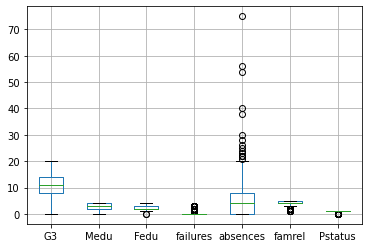

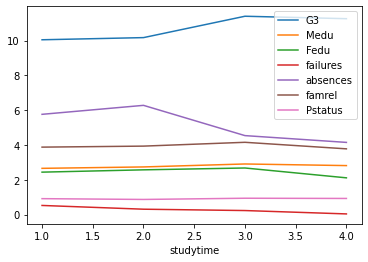

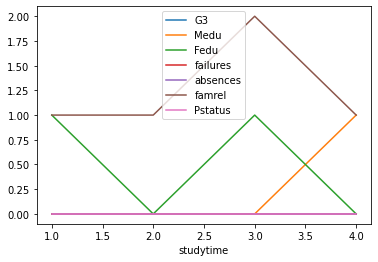

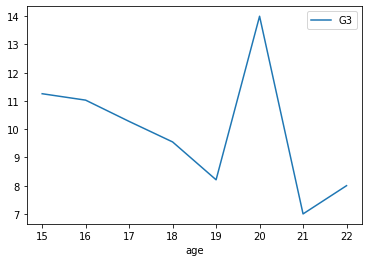

In [163]:
plot_cols = ["G3","Medu","Fedu","failures","absences","famrel","Pstatus"]
scores_filtered_df.filter(plot_cols).boxplot()
scores_filtered_df.groupby("studytime").mean().filter(plot_cols).plot()
scores_filtered_df.groupby("studytime").min().filter(plot_cols).plot()
scores_filtered_df.groupby("age").mean().plot(y="G3")


<AxesSubplot:xlabel='age'>

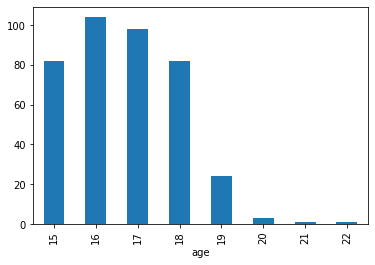

In [190]:
scores_filtered_df.groupby(['age']).size().plot(kind = "bar")

<AxesSubplot:ylabel='None'>

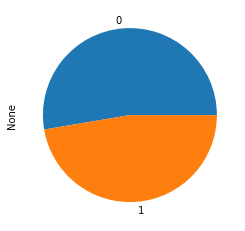

In [194]:
scores_filtered_df.groupby(['sex']).size().plot(kind = "pie")

<AxesSubplot:ylabel='None'>

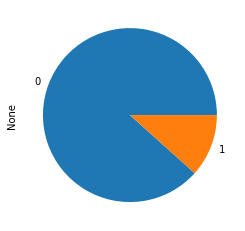

In [200]:
scores_filtered_df.groupby(['school']).size().plot(kind = "pie")

<AxesSubplot:xlabel='G3'>

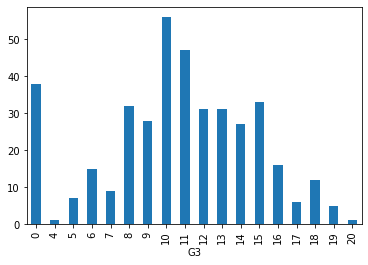

In [187]:
scores_filtered_df.groupby(['G3']).size().plot(kind = "bar")

In [203]:
plot_cols

['G3', 'Medu', 'Fedu', 'failures', 'absences', 'famrel', 'Pstatus']

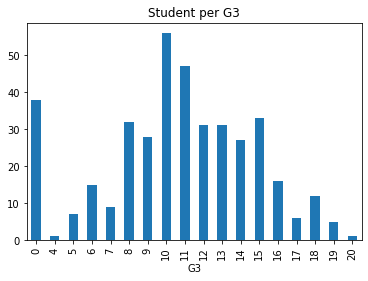

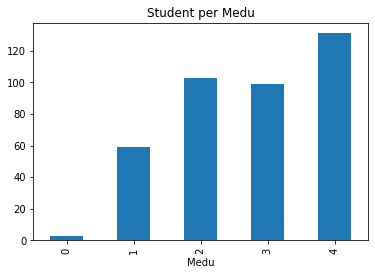

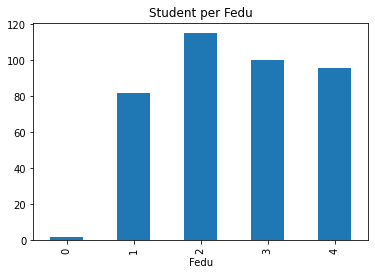

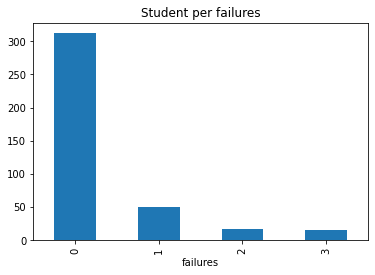

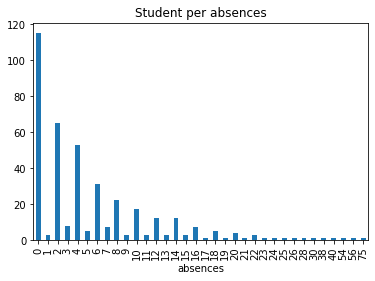

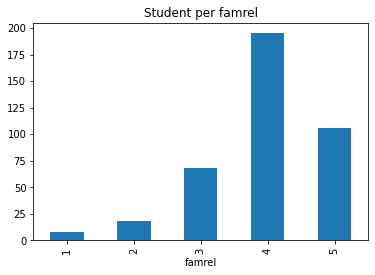

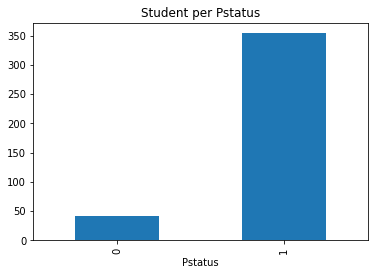

In [202]:
for col in plot_cols:
    ax = scores_filtered_df.groupby([col]).size().plot(kind = "bar")
    plt.title(f"Student per {col}")
    plt.show()

In [ ]:
def magnitude_size(magnitude):
    if magnitude < 2 :
        return 1
    if magnitude >= 2 and magnitude < 3 :
        return 1.5
    if magnitude >= 3 and magnitude < 4 :
        return 2
    if magnitude >= 4  :
        return 2.5
    
def depth_color(depth):
    if depth < 30 :
        return 'red'
    if depth >= 30 and depth < 40 :
        return 'blue'
    if depth >= 40 and depth < 60 :
        return 'black'
    if depth >= 60  :
        return 'yellow'
    if np.isnan(depth):
        return 'green'

di = {
    'size': scores_filtered_df.G3.apply(magnitude_size),
    'color' : scores_filtered_df.Depth.apply(depth_color)
}

plt.scatter(df.Lon,df.Lat,c=di['color'],s=di['size'])

<AxesSubplot:xlabel='studytime', ylabel='G3'>

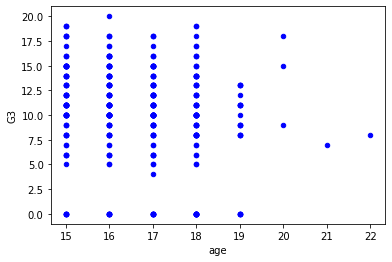

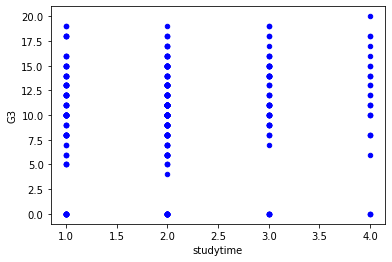

In [171]:

scores_filtered_df.plot.scatter("age","G3",c="b")
scores_filtered_df.plot.scatter("studytime","G3",c="b")


In [146]:
## Data Exploration & Visualisation <a id="DataExploration&Visualisation"></a>

In [147]:
import graphviz

In [ ]:
import matplotlib.pyplot as plt

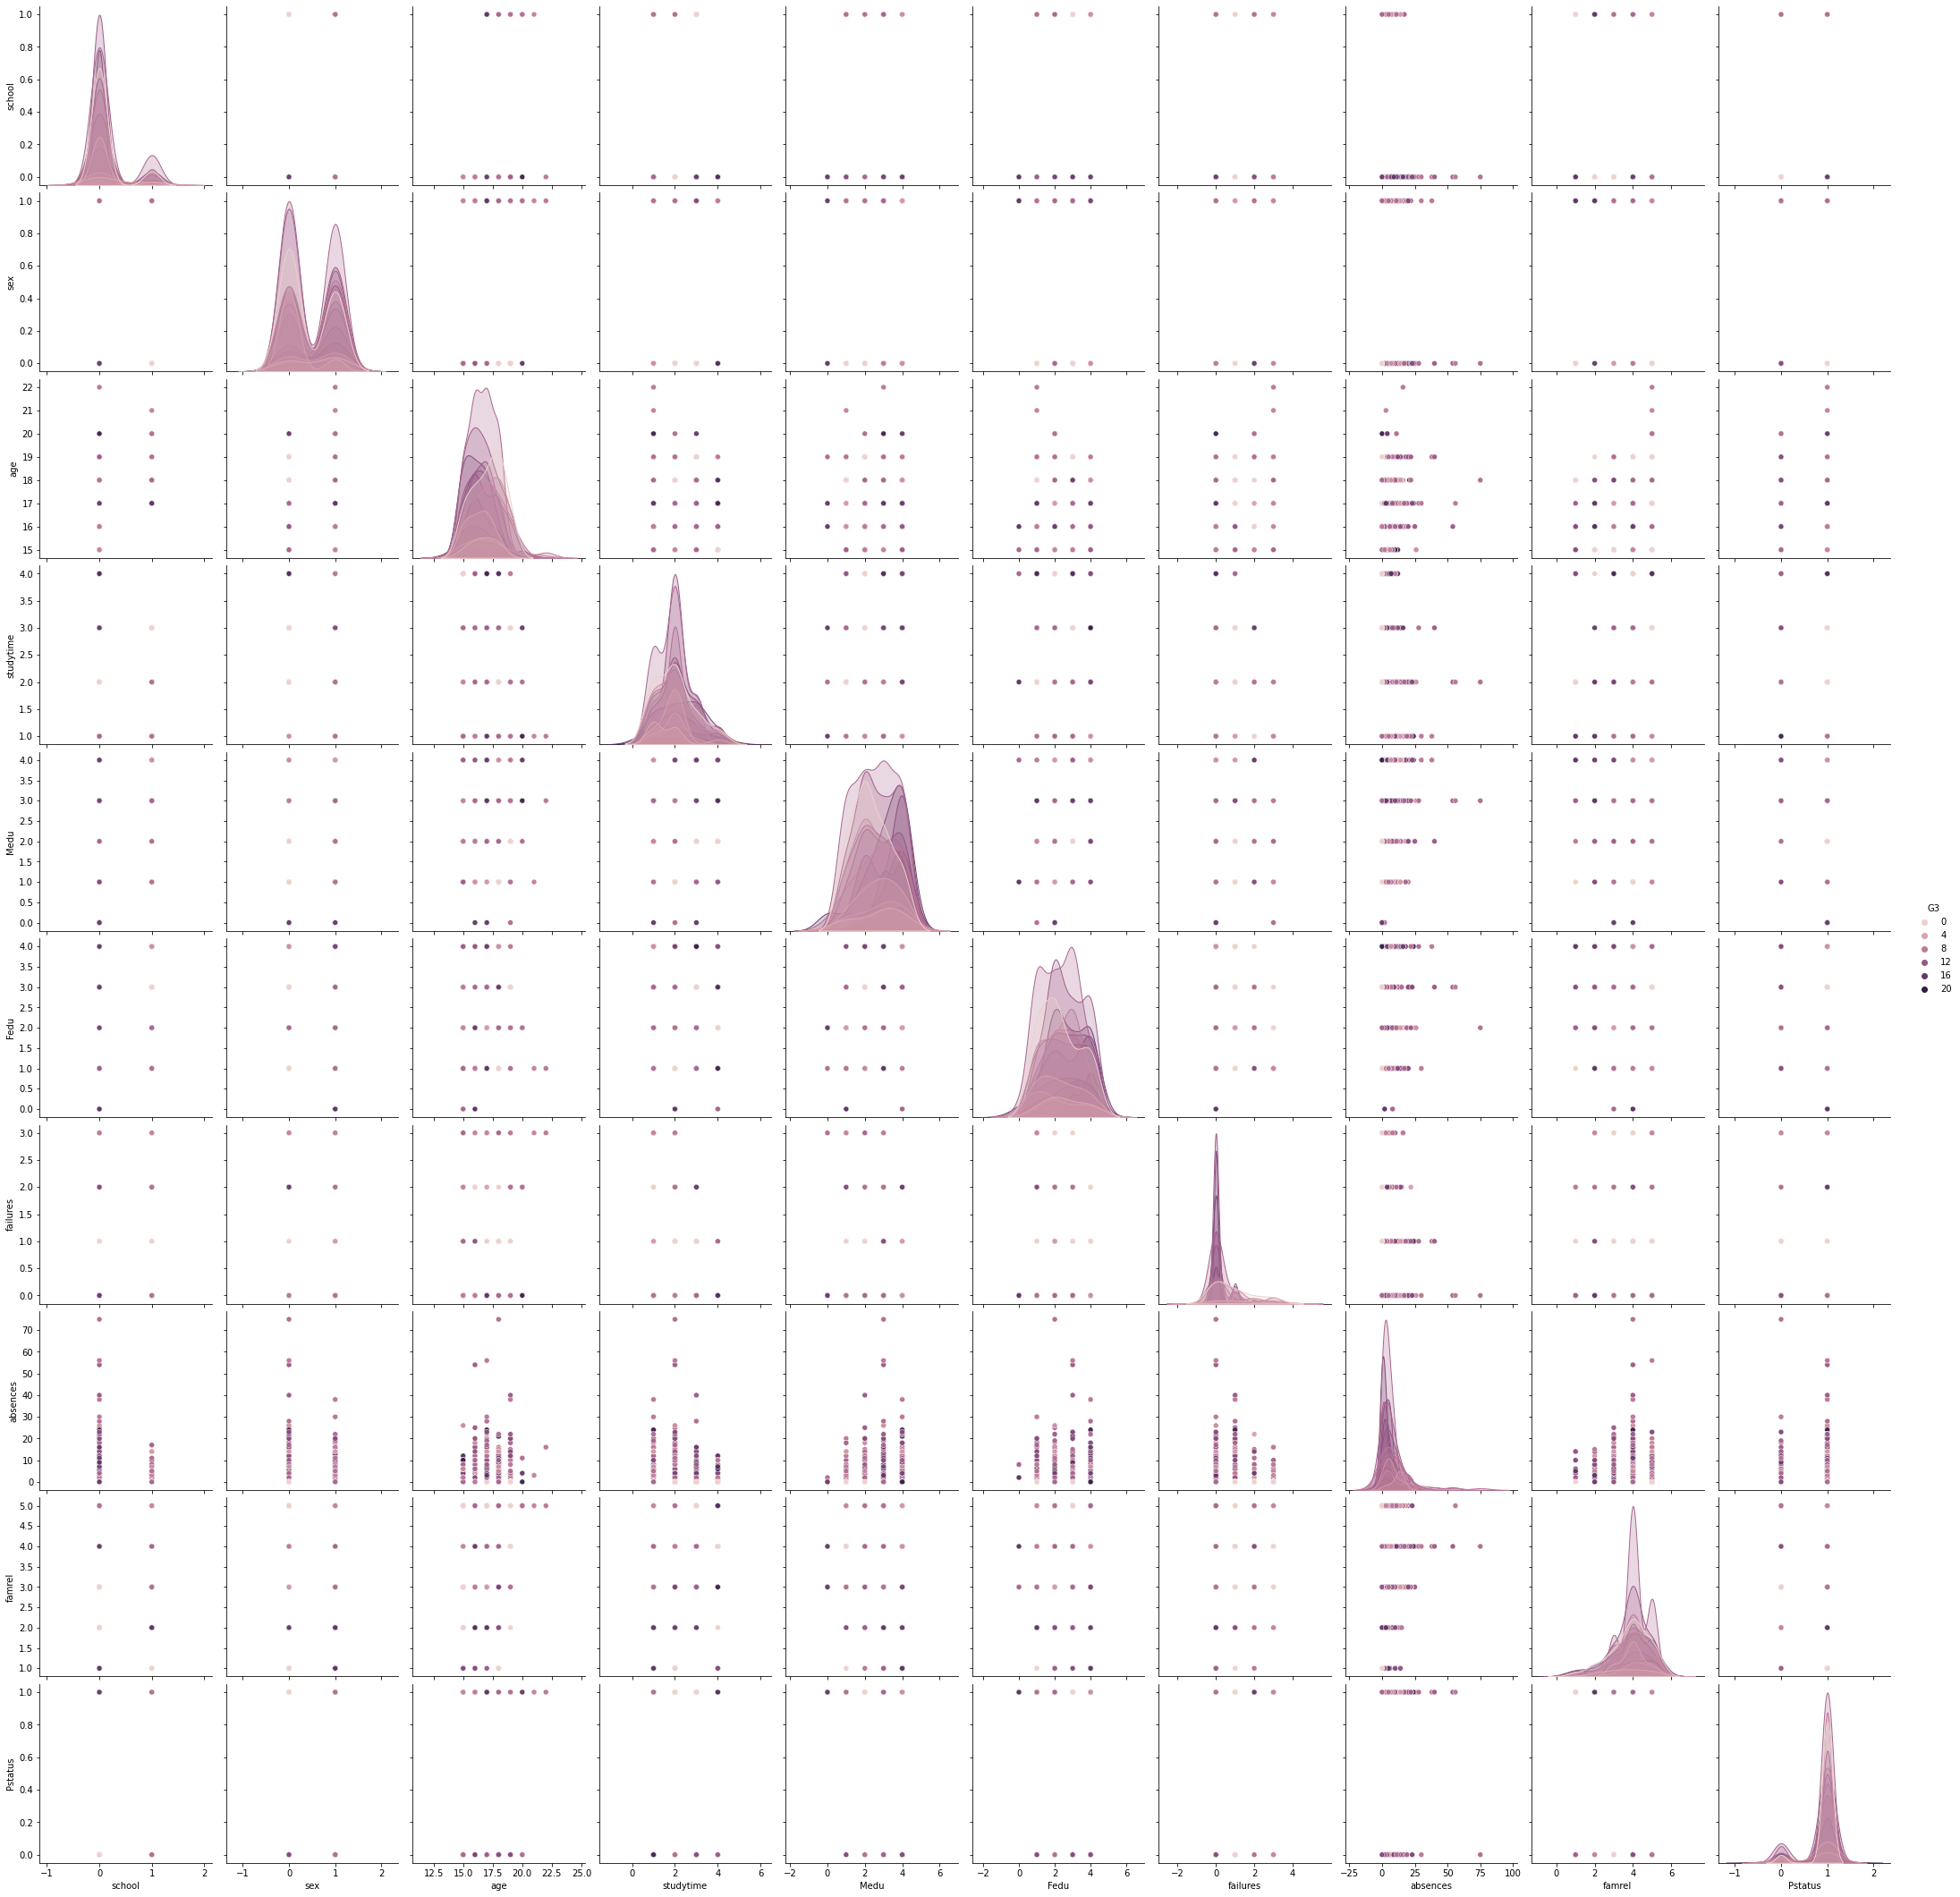

In [101]:
sns.pairplot(scores_filtered_df, hue="G3", size=3);
plt.show()

### Literature Review <a id="LiteratureReview"></a>

## Summary & Conclusions <a id="Summary&Conclusions"></a>

## References <a id="References"></a>

- kaggle.com. (n.d.). Student performance in Maths. [online] Available at: https://www.kaggle.com/code/parvinderkaur21/student-performance-in-maths/data [Accessed 29 Sep. 2022].
